In [18]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from collections import Counter
import math
import datetime as datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statistics
import glob
import ipyplot
import numpy as np
import matplotlib.pyplot as plt
from pyspedas.mms.mms_orbit_plot import mms_orbit_plot

from functions import data_preprocess_functions
from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [19]:
dir_name = 'idl_plots/output_sc1_sp3_300sec_multi_pa2_en2_subtraction_reduced_removebi_flux0.500.751.00_pap3.02.01.1/'+'data/sc1_sp3/'

# agg_beam_ext_filename = dir_name + 'idl_aggregated_fulldata_20170101_to_20201231.csv'

agg_beam_ext_filename = dir_name + 'aggregated_fulldata_20170101_to_20201231.csv'

agg_df = pd.read_csv(agg_beam_ext_filename)

agg_df['pressure_all'] = agg_df['pressure_h_all'] + agg_df['pressure_o_all']

In [21]:
agg_df.columns

Index(['Unnamed: 0', 'time', 'nbeam', 'energy', 'flag', 'date', 'datetime_str',
       'year', 'xgsm', 'ygsm', 'zgsm', 'ygse', 'zgse', 'mlt', 'l', 'bx',
       'by_gsm', 'bz_gsm', 'b', 'dist', 'beta', 'kp', 'swp', 'swv', 'dst',
       'f107', 'imfBy', 'imfBz', 'storm_phase', 'compression_mode',
       'density_o_all', 'velocity_o_all', 'pressure_o_all', 'density_h_all',
       'velocity_h_all', 'pressure_h_all', 'v_par_all', 'v_perp_all',
       'denergy', 'r', 'region', 'o_beam_filepath', 'pa', 'pa_range',
       'int_flux', 'flux', 'eflux', 'intergrated_flux', 'density_est', 't',
       'n', 'p', 'n_weighted', 'b_model', 'fllen', 'pressure_all'],
      dtype='object')

In [22]:
print(statistics.median(agg_df['swv']))
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(x=agg_df.loc[:,'swv']) ,row=1, col=1)# 

fig.update_layout(showlegend=False)


603.649169921875


In [35]:
# index = (agg_df['year'] == 2017) 

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(x=agg_df.loc[:,'region']) ,row=1, col=1)# 

fig.update_layout(showlegend=False)


In [40]:
# index = (agg_df['region'] == 'BL') 
index = (agg_df['region'] == 'BL') &  (agg_df['xgsm'] < -7)& (agg_df['xgsm'] > -17)& (agg_df['ygsm'] < 15)

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(x=agg_df.loc[index,'n_weighted']/agg_df.loc[index,'n']) ,row=1, col=1)# 

fig.update_layout(showlegend=False)


In [34]:
# index = (agg_df['region'] == 'Lobe') & (abs(agg_df['ygsm']) <15) & (agg_df['xgsm'] <-7) & (agg_df['xgsm'] >-17)

index = (agg_df['region'] == 'BL') &  (agg_df['xgsm'] < -7)& (agg_df['xgsm'] > -17)& (abs(agg_df['ygsm']) <15)

#index = (agg_df['region'] == 'BL') & (agg_df['energy'] < 100) & (agg_df['dist'] < 8)

#index = (agg_df['region'] == 'BL') & (agg_df['energy'] > 3000) & (abs(agg_df['ygsm']) <15) & (agg_df['ygsm'] > 0) & (agg_df['xgsm'] < -7)& (agg_df['xgsm'] > -17)

# index = (agg_df['year'] == 2017) & (agg_df['mlt'] > 1) & (agg_df['mlt'] < 3) & (agg_df['xgsm'] < -10)

print(sum(index))
# print("kp:",statistics.quantiles(agg_df.loc[index,'kp']))
# print("perp velocity:",statistics.quantiles(agg_df.loc[index,'v_perp_all']))
print("density:",statistics.quantiles(agg_df.loc[index,'n']))
# print(min(agg_df.loc[index,'v_perp_all']))

fig = px.scatter_3d(agg_df[index], x='xgsm', y='ygsm', z='zgsm', color = np.log10(agg_df.loc[index,'energy']), size_max = 1, hover_data = ['datetime_str', "n", "region", "pressure_all", "energy","datetime_str"])

fig.update_traces(marker_size = 1)

fig.update_layout(coloraxis_colorbar=dict(
    title="Density (log)",
    thicknessmode="pixels"
))

fig.show()

print(np.unique(agg_df.loc[index,'date']))

14-Jun-24 14:57:14: /home/jliao/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.




72
density: [0.0049612724838572, 0.00984913576971855, 0.015329990752573824]


['2018-04-27' '2018-05-03' '2018-05-05' '2018-05-08' '2018-05-09'
 '2019-05-11' '2019-05-14']


In [ ]:
iplot = 0

to_plot =  np.unique(list(dir_name+(agg_df.loc[index,'o_beam_filepath'])))

print(len(to_plot))

ipyplot.plot_images(to_plot[0+iplot*30:30+iplot*30], img_width=400)

In [29]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("density", "parallel velocity"))

fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index,'n'])) ,row=1, col=1)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index,'v_par_all'])) ,row=1, col=2)

print(statistics.median(agg_df.loc[index,'n']))
print(statistics.median(agg_df.loc[index,'v_par_all']))

fig.update_layout(showlegend=False)




14-Jun-24 14:50:41: /home/jliao/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.




0.02285718798355035
30.382814667147606


In [27]:
index11 = index & (agg_df['region'] == 'Lobe') & (agg_df['energy'] < 100)
index12 = index & (agg_df['region'] == 'Lobe') & (agg_df['energy'] > 100)& (agg_df['energy'] < 1000)
index13 = index & (agg_df['region'] == 'Lobe') & (agg_df['energy'] > 1000)& (agg_df['energy'] < 3000)
index14 = index & (agg_df['region'] == 'Lobe') & (agg_df['energy'] > 3000)

index21 = index & (agg_df['region'] == 'BL') & (agg_df['energy'] < 100)
index22 = index & (agg_df['region'] == 'BL') & (agg_df['energy'] > 100)& (agg_df['energy'] < 1000)
index23 = index & (agg_df['region'] == 'BL') & (agg_df['energy'] > 1000)& (agg_df['energy'] < 3000)
index24 = index & (agg_df['region'] == 'BL') & (agg_df['energy'] > 3000)

index31 = index & (agg_df['region'] == 'PS') & (agg_df['energy'] < 100)
index32 = index & (agg_df['region'] == 'PS') & (agg_df['energy'] > 100)& (agg_df['energy'] < 1000)
index33 = index & (agg_df['region'] == 'PS') & (agg_df['energy'] > 1000)& (agg_df['energy'] < 3000)
index34 = index & (agg_df['region'] == 'PS') & (agg_df['energy'] > 3000)

fig = make_subplots(rows=3, cols=4, subplot_titles=("density: 1-100 eV", "100-1k eV", "1k-3k eV", "3k - 40k eV"))

fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index11,'n'])) ,row=1, col=1)# 


fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index12,'n'])) ,row=1, col=2)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index13,'n'])) ,row=1, col=3)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index14,'n'])) ,row=1, col=4)

fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index21,'n'])) ,row=2, col=1)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index22,'n'])) ,row=2, col=2)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index23,'n'])) ,row=2, col=3)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index24,'n'])) ,row=2, col=4)

fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index31,'n'])) ,row=3, col=1)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index32,'n'])) ,row=3, col=2)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index33,'n'])) ,row=3, col=3)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index34,'n'])) ,row=3, col=4)


# #fig.add_trace(go.Histogram(x=agg_df.loc[index12,'v'], xbins=dict(start=0,end=400, size=10)), row=1, col=1)
# fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index1,'n'])) ,row=1, col=2)

# fig.add_trace(go.Histogram(x=agg_df.loc[index2,'v']), row=2, col=1)
# fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index2,'n'])) ,row=2, col=2)

# fig.add_trace(go.Histogram(x=agg_df.loc[index3,'v']), row=3, col=1)
# fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index3,'n'])) ,row=3, col=2)


fig.update_layout(showlegend=False)


14-Jun-24 14:50:32: Loading pydata/mms1/mec/srvy/l2/epht89q/2019/10/mms1_mec_srvy_l2_epht89q_20191025_v2.2.0.cdf
14-Jun-24 14:50:32: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:32: Loaded variables:
14-Jun-24 14:50:32: mms1_mec_r_gsm


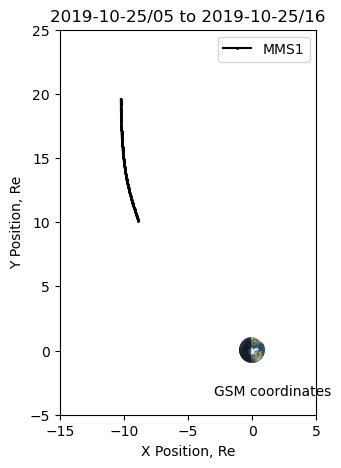

14-Jun-24 14:50:33: Loading pydata/mms1/mec/srvy/l2/epht89q/2019/10/mms1_mec_srvy_l2_epht89q_20191025_v2.2.0.cdf
14-Jun-24 14:50:33: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:33: Loaded variables:
14-Jun-24 14:50:33: mms1_mec_r_gsm


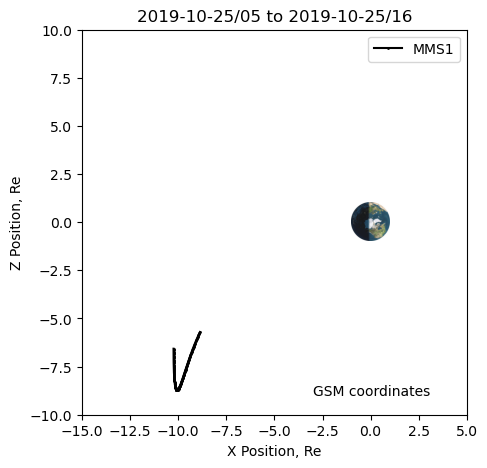

14-Jun-24 14:50:33: Loading pydata/mms1/mec/srvy/l2/epht89q/2019/10/mms1_mec_srvy_l2_epht89q_20191025_v2.2.0.cdf
14-Jun-24 14:50:33: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:33: Loaded variables:
14-Jun-24 14:50:33: mms1_mec_r_gsm


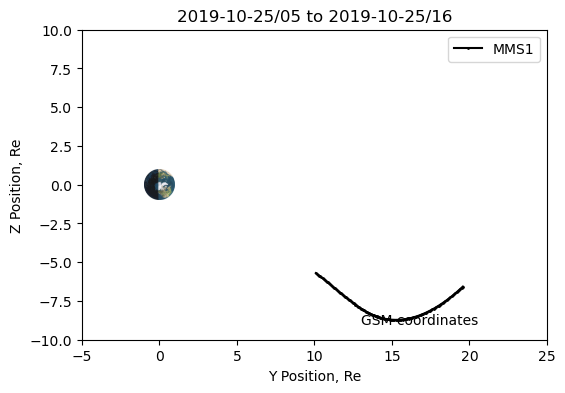

14-Jun-24 14:50:34: Loading pydata/mms1/mec/srvy/l2/epht89q/2017/07/mms1_mec_srvy_l2_epht89q_20170701_v2.0.2.cdf
14-Jun-24 14:50:34: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:34: Loaded variables:
14-Jun-24 14:50:34: mms1_mec_r_gsm


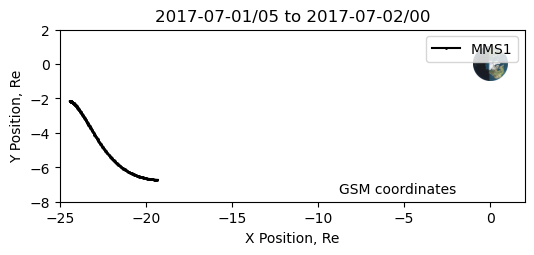

14-Jun-24 14:50:34: Loading pydata/mms1/mec/srvy/l2/epht89q/2017/07/mms1_mec_srvy_l2_epht89q_20170701_v2.0.2.cdf
14-Jun-24 14:50:34: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:34: Loaded variables:
14-Jun-24 14:50:34: mms1_mec_r_gsm


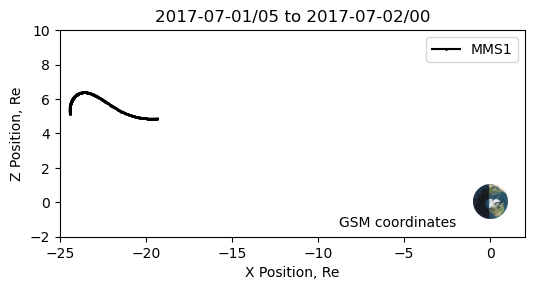

14-Jun-24 14:50:35: Loading pydata/mms1/mec/srvy/l2/epht89q/2017/07/mms1_mec_srvy_l2_epht89q_20170701_v2.0.2.cdf
14-Jun-24 14:50:35: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:35: Loaded variables:
14-Jun-24 14:50:35: mms1_mec_r_gsm


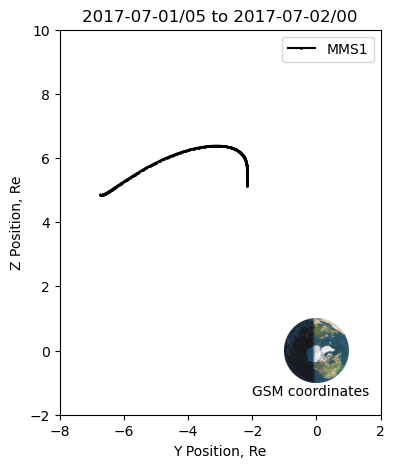

14-Jun-24 14:50:35: Loading pydata/mms1/mec/srvy/l2/epht89q/2020/10/mms1_mec_srvy_l2_epht89q_20201027_v2.2.2.cdf
14-Jun-24 14:50:35: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:35: Loaded variables:
14-Jun-24 14:50:35: mms1_mec_r_gsm


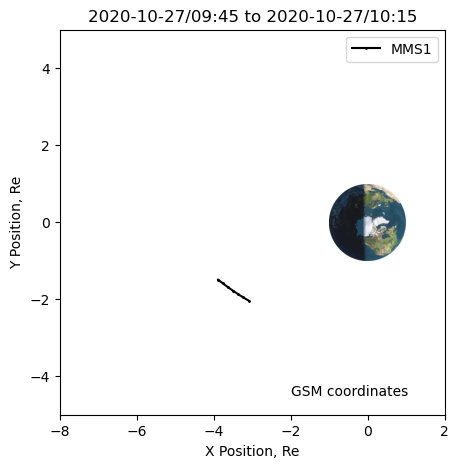

14-Jun-24 14:50:36: Loading pydata/mms1/mec/srvy/l2/epht89q/2020/10/mms1_mec_srvy_l2_epht89q_20201027_v2.2.2.cdf
14-Jun-24 14:50:36: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:36: Loaded variables:
14-Jun-24 14:50:36: mms1_mec_r_gsm


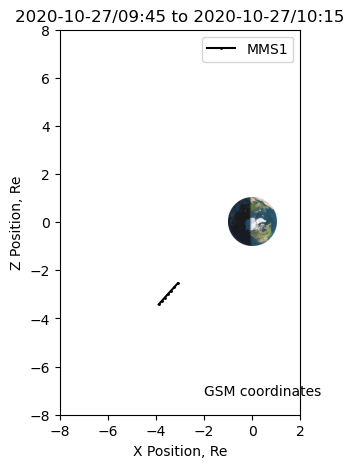

14-Jun-24 14:50:36: Loading pydata/mms1/mec/srvy/l2/epht89q/2020/10/mms1_mec_srvy_l2_epht89q_20201027_v2.2.2.cdf
14-Jun-24 14:50:36: Time clip was applied to: mms1_mec_r_gsm
14-Jun-24 14:50:36: Loaded variables:
14-Jun-24 14:50:36: mms1_mec_r_gsm


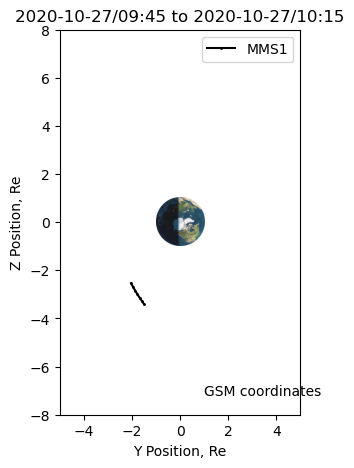

In [28]:
mms_orbit_plot(trange=['2019-10-25/05', '2019-10-25/16'], plane='xy',coord='gsm',xr=[-15,5],yr=[-5,25], marker='.', markersize=2,probes='1',save_svg='orbit_2019_10_25_xy',xsize=6)
mms_orbit_plot(trange=['2019-10-25/05', '2019-10-25/16'], plane='xz',coord='gsm',xr=[-15,5],yr=[-10,10], marker='.', markersize=2,probes='1',save_svg='orbit_2019_10_25_xz',xsize=6)
mms_orbit_plot(trange=['2019-10-25/05', '2019-10-25/16'], plane='yz',coord='gsm',xr=[-5,25],yr=[-10,10], marker='.', markersize=2,probes='1',save_svg='orbit_2019_10_25_yz',xsize=6)

mms_orbit_plot(trange=['2017-07-01/05', '2017-07-02/00'], plane='xy',coord='gsm',xr=[-25,2],yr=[-8,2], marker='.', markersize=2,probes='1',save_svg='orbit_2017_07_01_xy',xsize=6)
mms_orbit_plot(trange=['2017-07-01/05', '2017-07-02/00'], plane='xz',coord='gsm',xr=[-25,2],yr=[-2,10], marker='.', markersize=2,probes='1',save_svg='orbit_2017_07_01_xz',xsize=6)
mms_orbit_plot(trange=['2017-07-01/05', '2017-07-02/00'], plane='yz',coord='gsm',xr=[-8,2],yr=[-2,10], marker='.', markersize=2,probes='1',save_svg='orbit_2017_07_01_yz',xsize=6)

mms_orbit_plot(trange=['2020-10-27/09:45', '2020-10-27/10:15'], plane='xy',coord='gsm',xr=[-8,2],yr=[-5,5], marker='.', markersize=2,probes='1',save_svg='orbit_2020_10_27_xy',xsize=6)
mms_orbit_plot(trange=['2020-10-27/09:45', '2020-10-27/10:15'], plane='xz',coord='gsm',xr=[-8,2],yr=[-8,8], marker='.', markersize=2,probes='1',save_svg='orbit_2020_10_27_xz',xsize=6)
mms_orbit_plot(trange=['2020-10-27/09:45', '2020-10-27/10:15'], plane='yz',coord='gsm',xr=[-5,5],yr=[-8,8], marker='.', markersize=2,probes='1',save_svg='orbit_2020_10_27_yz',xsize=6)